### Create final combined dataset

As all the data are now available, the model will need a combined single dataset with all the features to train.

Initially, each dataset must be analysed to see if the features available do have an impact on the price to be predicted. If not, the features can be excluded when creating the final dataset, as it is at that point, only additional noise that has no real impact.

In [1]:
import pandas as pd

In [4]:
TRENDS_DATA = '../../data/GTrends/BTC_GTrends_total.csv'
TWEETS_DATA = '../../data/Tweets/BTC_Tweet_Sentiment_Unweighed.csv'
TWEET_VOLUME_DATA = '../../data/Tweets/BTC_Tweet_Volume.csv'
BLOCK_REWARD_DATA = '../../data/BTC_Block_Reward.csv'
BTC_PRICES_DATA = '../../data/BTC_Prices.csv'

### Analyze prices dataset

In [5]:
historical_prices = pd.read_csv(BTC_PRICES_DATA)
historical_prices.head()

,date,volume,close,open,max,min,change_percent
0,2014-01-01,10757,815.940002,805.940002,829.929993,770.969971,1.240787
1,2014-01-02,12812,856.909973,815.940002,886.210022,810.469971,5.021199
2,2014-01-03,9709,884.260010,856.909973,888.229980,839.440002,3.191705
3,2014-01-04,14239,924.690002,884.260010,932.159973,848.320007,4.572184
4,2014-01-05,21374,1014.739990,924.690002,1029.859985,911.359985,9.738397


In [6]:
closing_price = historical_prices['close']
closing_price[:10]

0     815.940002
1     856.909973
2     884.260010
3     924.690002
4    1014.739990
5    1012.650024
6     879.900024
7     938.840027
8     936.950012
9     957.760010
Name: close, dtype: float64

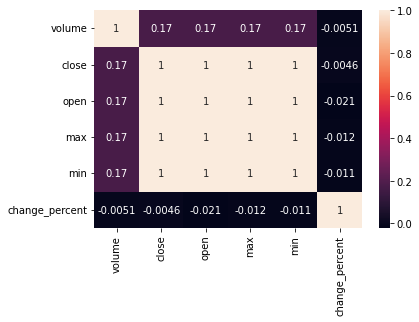

In [12]:
# Check correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(historical_prices.corr(), annot=True)
plt.show()

In [13]:
# Due to the large correlation of variables and closing price: max, min, open can be dropped
historical_prices.drop(['max', 'min', 'open'], axis=1, inplace=True)
historical_prices.head()

,date,volume,close,change_percent
0,2014-01-01,10757,815.940002,1.240787
1,2014-01-02,12812,856.909973,5.021199
2,2014-01-03,9709,884.260010,3.191705
3,2014-01-04,14239,924.690002,4.572184
4,2014-01-05,21374,1014.739990,9.738397


As the `max, min, open` features are highly correlated, they are dropped. The `volume` and `change_percent` features can remain as they aren't.